In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_12724\2452807622.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
img = cv2.imread(r'D:\dungnd\data\realfake\real-vs-fake\train\fake\003IRD4LS5.jpg')
img.shape 

(256, 256, 3)

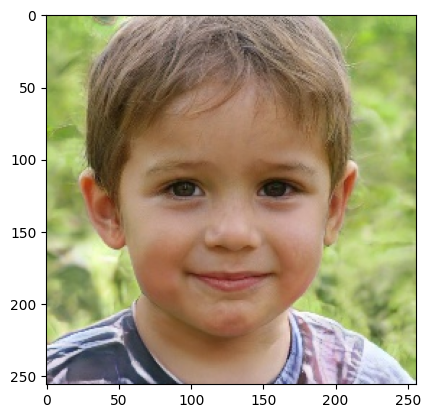

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
data_dir = r"D:\dungnd\data\realfake\real-vs-fake"

train_data = os.path.join(data_dir,'train')
valid_data = os.path.join(data_dir,'valid')
test_data = os.path.join(data_dir,'test')

class_names = ['fake', 'real']

train = tf.keras.utils.image_dataset_from_directory(train_data,class_names=class_names)
valid = tf.keras.utils.image_dataset_from_directory(valid_data,class_names=class_names)
test = tf.keras.utils.image_dataset_from_directory(test_data,class_names=class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [5]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers, models

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
# model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [8]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5,
                                                    restore_best_weights=True)
checkpoint_filepath = r'D:\dungnd\GraduationProject\checkpoint\face_classification_checkpoint\model_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.4f}.h5'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

hist = model.fit(train, epochs=70, validation_data=valid, callbacks=[reduce_lr, checkpoint_cb])

Epoch 1/70
3125/3125 [==============================] - 5260s 2s/step - loss: 0.7184 - accuracy: 0.5152 - val_loss: 0.7239 - val_accuracy: 0.5797 - lr: 0.0010
Epoch 2/70
3125/3125 [==============================] - 5653s 2s/step - loss: 0.6842 - accuracy: 0.7198 - val_loss: 0.5693 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 3/70
3125/3125 [==============================] - 7704s 2s/step - loss: 0.5943 - accuracy: 0.7945 - val_loss: 0.5063 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 4/70
3125/3125 [==============================] - 7783s 2s/step - loss: 0.5548 - accuracy: 0.8220 - val_loss: 0.4619 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 5/70
3125/3125 [==============================] - 7712s 2s/step - loss: 0.5259 - accuracy: 0.8426 - val_loss: 0.4503 - val_accuracy: 0.8909 - lr: 0.0010
Epoch 6/70
3125/3125 [==============================] - 7832s 3s/step - loss: 0.5009 - accuracy: 0.8583 - val_loss: 0.4091 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 7/70
3125/3125 [========================

: 

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers, models

C:\Users\Admin\AppData\Local\Temp\ipykernel_18092\2274964319.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
# model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

model.load_weights(r'D:\dungnd\GraduationProject\checkpoint\face_classification_checkpoint\model_epoch_37_val_accuracy_0.9735.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

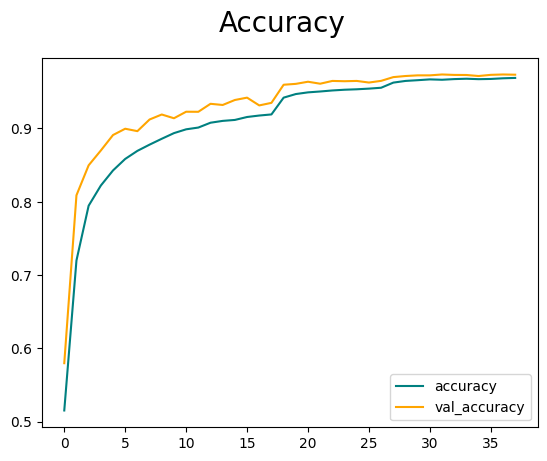

In [4]:
import pickle   
f = open(r'D:\dungnd\GraduationProject\checkpoint\face_classification_checkpoint\face_classification_history.pckl', 'rb')
history = pickle.load(f)
f.close()


fig = plt.figure()
plt.plot(history['accuracy'], color='teal', label='accuracy')
plt.plot(history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

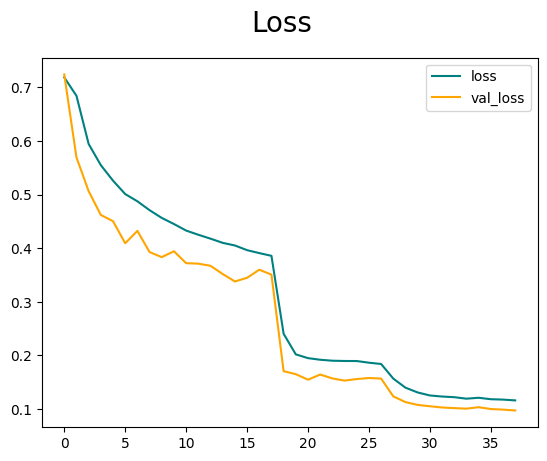

In [6]:
fig = plt.figure()
plt.plot(history['loss'], color='teal', label='loss')
plt.plot(history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [8]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 402ms/step


In [9]:
print('Precision',pre.result().numpy(), "\nRecal",re.result().numpy(),"\nAccuracy", acc.result().numpy())

Precision 0.5023938 
Recal 0.9969 
Accuracy 0.50475


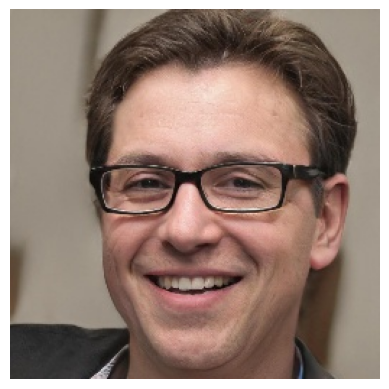

1/1 [==============================] - 0s 74ms/step
[[1.6596157e-05]]
Predicted class is fake


In [16]:
img = cv2.imread(r"D:\dungnd\data\realfake\real-vs-fake\test\fake\0G7K72KBYU.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.axis('off')
plt.show()

resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

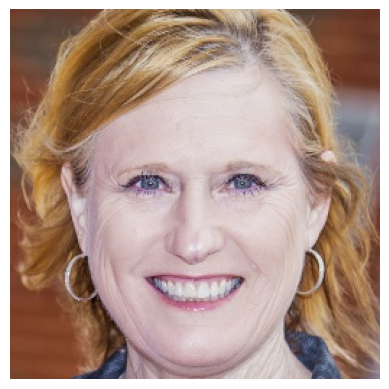

1/1 [==============================] - 0s 86ms/step
[[0.99244994]]
Predicted class is real


In [17]:
img = cv2.imread(r"D:\dungnd\data\realfake\real-vs-fake\test\real\00445.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.axis('off')
plt.show()

resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers

import os

import numpy as np
from matplotlib import pyplot as plt

data_dir = r"D:\dungnd\data\realfake\real-vs-fake"

train_data = os.path.join(data_dir,'train')
valid_data = os.path.join(data_dir,'valid')
test_data = os.path.join(data_dir,'test')

class_names = ['fake', 'real']

train = tf.keras.utils.image_dataset_from_directory(train_data,class_names=class_names)
valid = tf.keras.utils.image_dataset_from_directory(valid_data,class_names=class_names)
test = tf.keras.utils.image_dataset_from_directory(test_data,class_names=class_names)

train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))
test = test.map(lambda x, y: (x / 255, y))


model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
# model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()


model.load_weights(r'D:\dungnd\GraduationProject\checkpoint\face_classification_checkpoint\model_epoch_37_val_accuracy_0.9735.h5')

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       7385

In [28]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

625/625 [==============================] - 1319s 2s/step - loss: 0.0966 - accuracy: 0.9747
Test Loss: 0.09662812203168869
Test Accuracy: 0.9746500253677368


1/1 [==============================] - 3s 3s/step


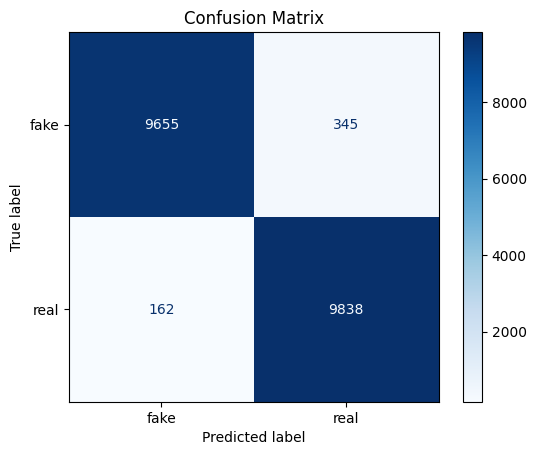

Precision 0.96612 
Recal 0.9838


In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Collect true labels and predicted labels
true_labels = []
predicted_labels = []

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    true_labels.extend(y)
    predicted_labels.extend(yhat)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels) > 0.5  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print('Precision',pre.result().numpy(), "\nRecal",re.result().numpy())
